In [1]:
from google.colab import files

upload=files.upload()

Saving online_gaming_behavior_dataset.csv to online_gaming_behavior_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, OrdinalEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#no use imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from sklearn import metrics

In [3]:
df=pd.read_csv('online_gaming_behavior_dataset.csv')
df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [4]:
renamed_columns = {'Age': 'age', 'Gender': 'gender', 'Location': 'location', 'GameGenre': 'g_genre',
                  'PlayTimeHours': 'play_time', 'InGamePurchases': 'g_purchases', 'GameDifficulty': 'g_difficulty',
                  'SessionsPerWeek': 'sessions_week', 'AvgSessionDurationMinutes': 'avg_sesion_duration',
                  'PlayerLevel': 'p_level', 'AchievementsUnlocked': 'achievements', 'EngagementLevel': 'engagement_level'}

In [5]:
df.rename(columns=renamed_columns, inplace=True)
df

,PlayerID,age,gender,location,g_genre,play_time,g_purchases,g_difficulty,sessions_week,avg_sesion_duration,p_level,achievements,engagement_level
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PlayerID             40034 non-null  int64  
 1   age                  40034 non-null  int64  
 2   gender               40034 non-null  object 
 3   location             40034 non-null  object 
 4   g_genre              40034 non-null  object 
 5   play_time            40034 non-null  float64
 6   g_purchases          40034 non-null  int64  
 7   g_difficulty         40034 non-null  object 
 8   sessions_week        40034 non-null  int64  
 9   avg_sesion_duration  40034 non-null  int64  
 10  p_level              40034 non-null  int64  
 11  achievements         40034 non-null  int64  
 12  engagement_level     40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 4.0+ MB


In [7]:
#missing vallues
df.isnull().sum()

,0
PlayerID,0
age,0
gender,0
location,0
g_genre,0
play_time,0
g_purchases,0
g_difficulty,0
sessions_week,0
avg_sesion_duration,0


In [8]:
df

,PlayerID,age,gender,location,g_genre,play_time,g_purchases,g_difficulty,sessions_week,avg_sesion_duration,p_level,achievements,engagement_level
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [9]:
df.dtypes

,0
PlayerID,int64
age,int64
gender,object
location,object
g_genre,object
play_time,float64
g_purchases,int64
g_difficulty,object
sessions_week,int64
avg_sesion_duration,int64


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,PlayerID,age,play_time,g_purchases,sessions_week,avg_sesion_duration,p_level,achievements
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [12]:
#preprocessinng
df = df.drop(['PlayerID'], axis=1)

In [13]:
location_counts = df['location'].value_counts()
location_counts

,count
location,
USA,16000
Europe,12004
Asia,8095
Other,3935


In [14]:
cat_col = ['gender', 'location', 'g_genre', 'g_purchases', 'g_difficulty', 'engagement_level']
num_col = [col for col in df.columns if col not in cat_col and df[col].dtype in ['int64', 'float64']]

print("Categorical Columns:", cat_col)
print("Numerical Columns:", num_col)

Categorical Columns: ['gender', 'location', 'g_genre', 'g_purchases', 'g_difficulty', 'engagement_level']
Numerical Columns: ['age', 'play_time', 'sessions_week', 'avg_sesion_duration', 'p_level', 'achievements']


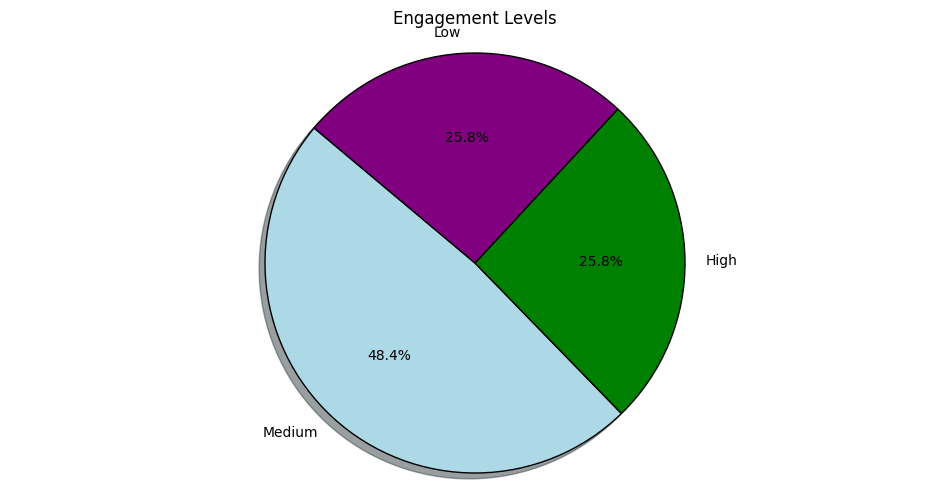

In [15]:
engagement_count = df['engagement_level'].value_counts()
engage_lvls = engagement_count.index.tolist()

counts = engagement_count.values.tolist()
total_counts = sum(counts)

percentages = [(count / total_counts) * 100 for count in counts]

plt.figure(figsize=(12, 6))
plt.pie(percentages, labels=df['engagement_level'].value_counts().index.tolist(), colors= ['lightblue', 'green', 'purple'], autopct='%1.1f%%', startangle=140,
        shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title('Engagement Levels')
plt.axis('equal')

plt.show()

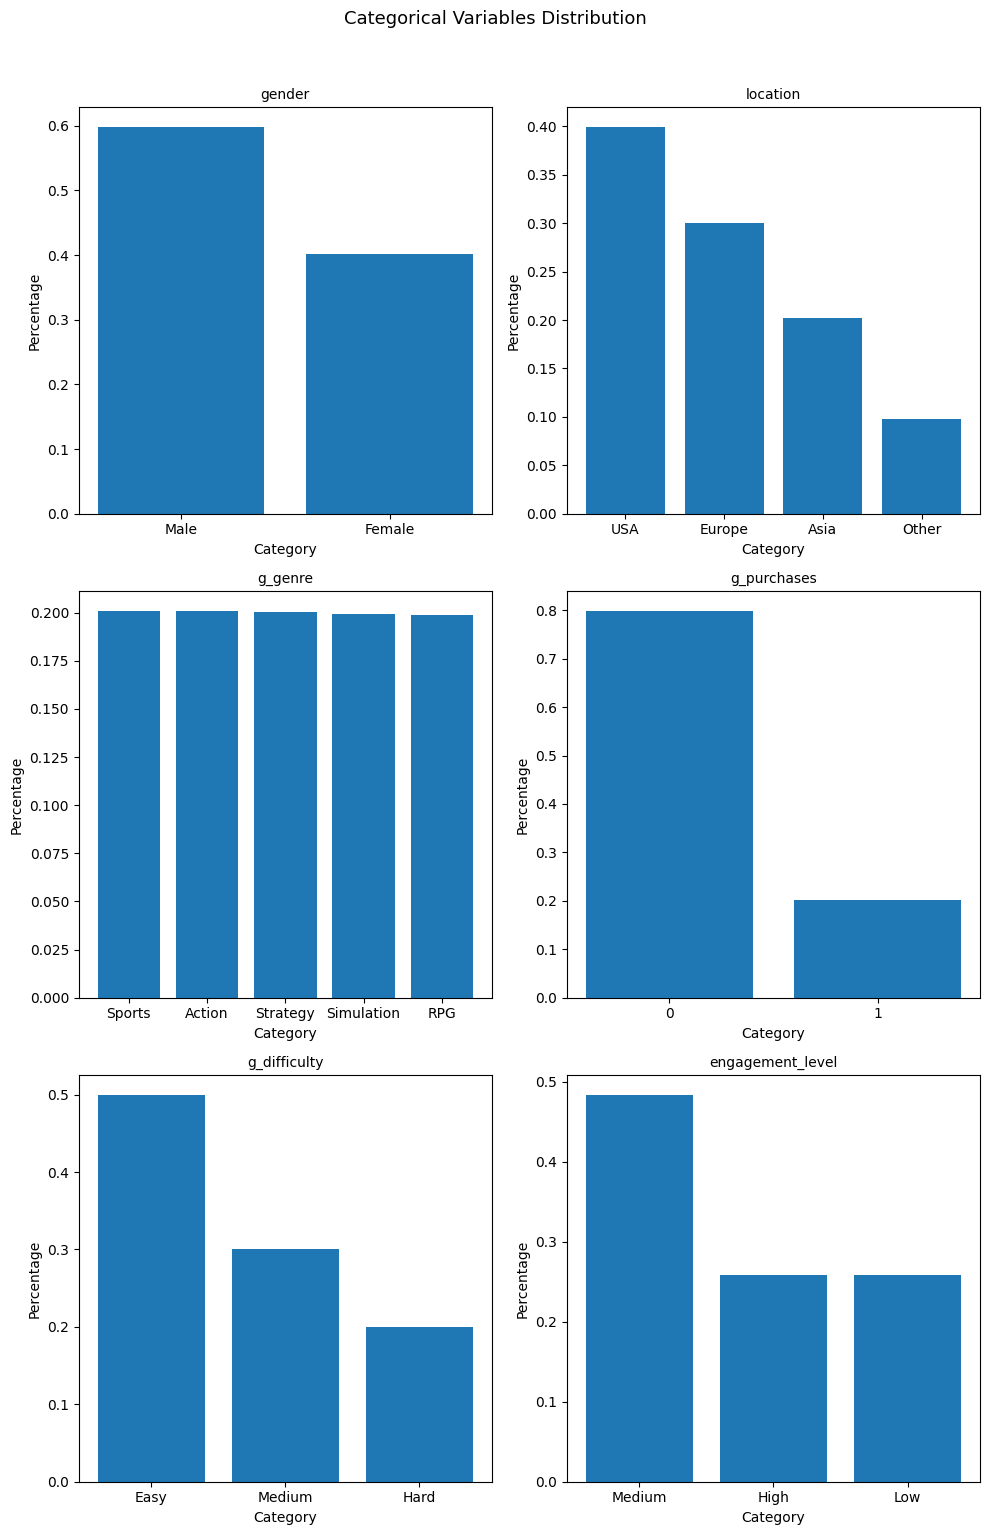

In [16]:
fig, axs = plt.subplots(len(cat_col) // 2 + len(cat_col) % 2, 2, figsize=(10, 15))
# subplots(rows=cantidad cat / 2 + sobrante(si hay), columns=2, size)
axs = axs.flatten()

for i, col in enumerate(cat_col):
    vc = df[col].value_counts(normalize=True) # %
    axs[i].bar(vc.index.astype(str), vc) # x, y
    axs[i].set_title(col, fontsize=10) # title
    axs[i].set_xlabel('Category')
    axs[i].set_ylabel('Percentage')

plt.suptitle('Categorical Variables Distribution', fontsize=13, y=1.02)
plt.tight_layout() # bien separados, no overlapping
plt.show()


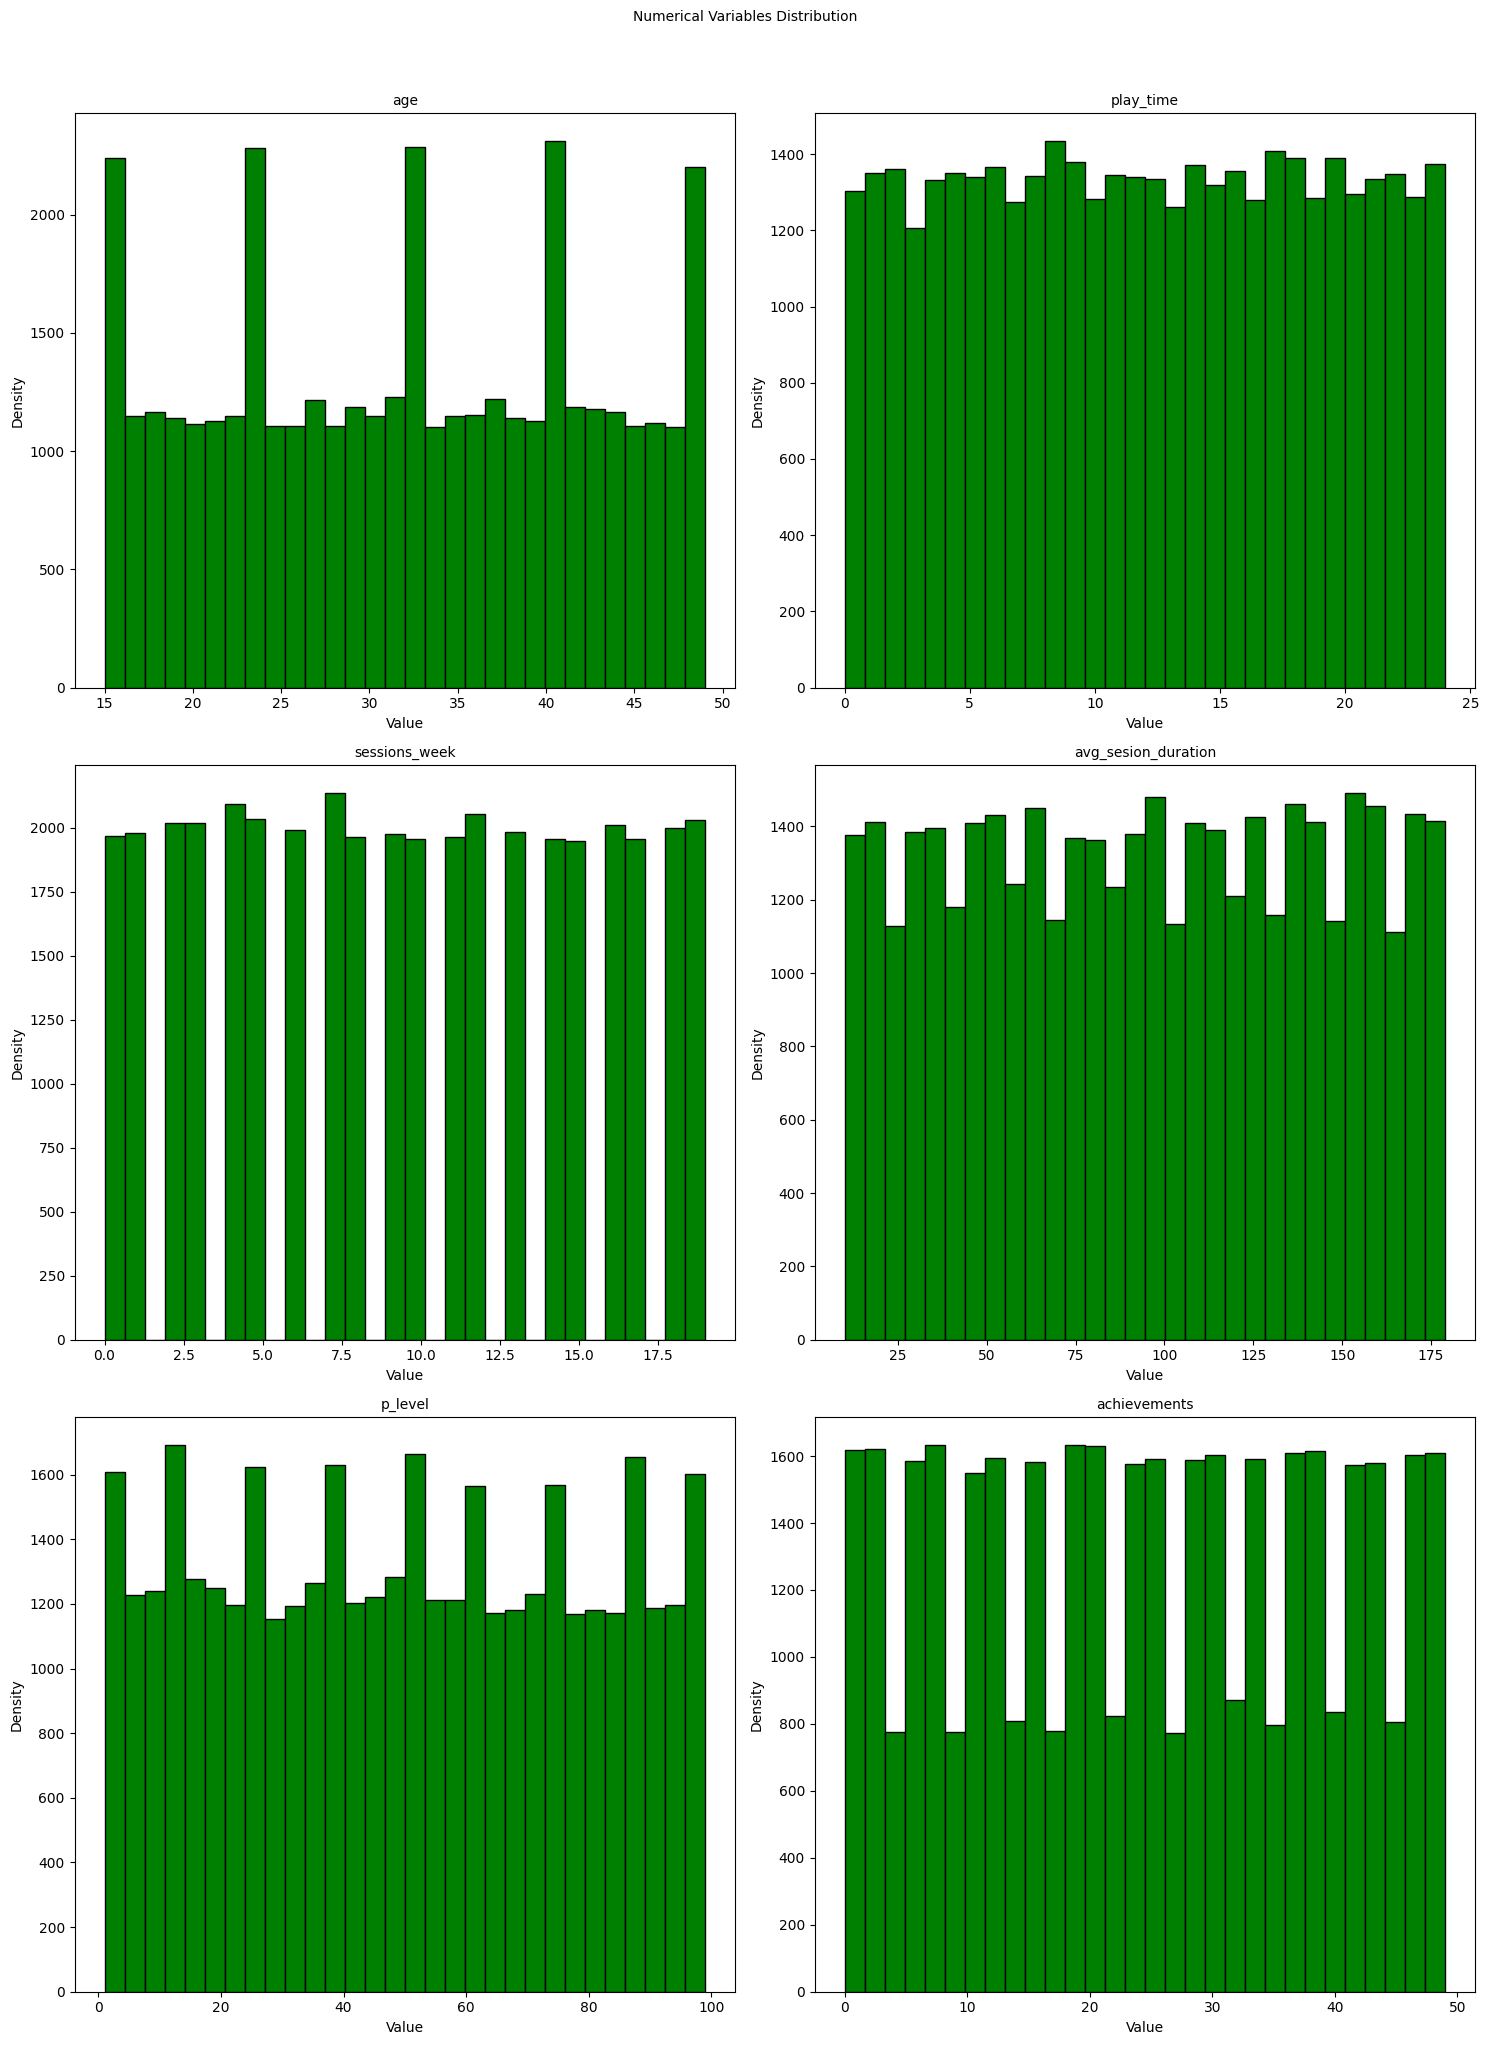

In [17]:

fig, axs = plt.subplots(len(num_col) // 2 + len(num_col) % 2, 2, figsize=(15, 20))
# subplots(rows=cantidad num / 2 + sobrante(si hay), columns=2, size)
axs = axs.flatten()

for i, col in enumerate(num_col):
    vc = df[col].value_counts(normalize=True) # %
    axs[i].hist(df[col], bins=30, edgecolor='black', color='green') # bins=separado de barras
    axs[i].set_title(col, fontsize=10)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')

plt.suptitle('Numerical Variables Distribution', fontsize=10, y=1.02)
plt.tight_layout() # bien separados, no overlapping
plt.show()

In [18]:
cat_col.remove('engagement_level')

for col in cat_col:
    vc = df[col].value_counts()
    mapping = {value: idx for idx, value in enumerate(vc.index)}
    df[col] = df[col].map(mapping)

engagement_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['engagement_level'] = df['engagement_level'].map(engagement_mapping)

df.head()

,age,gender,location,g_genre,play_time,g_purchases,g_difficulty,sessions_week,avg_sesion_duration,p_level,achievements,engagement_level
0,43,0,3,2,16.271119,0,1,6,108,79,25,1
1,29,1,0,2,5.525961,0,1,5,144,11,10,1
2,22,1,0,0,8.223755,0,0,16,142,35,41,2
3,35,0,0,1,5.265351,1,0,9,85,57,47,1
4,33,0,1,1,15.531945,0,1,2,131,95,37,1


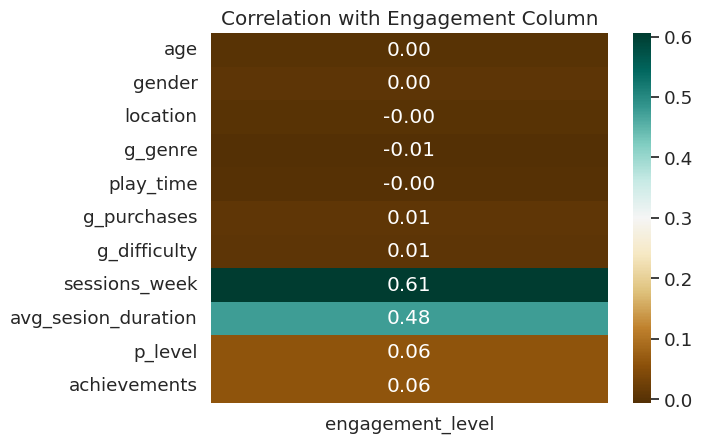

In [19]:
corr = df.corr()

target_corr = corr['engagement_level'].drop('engagement_level')

sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr.to_frame(), cmap="BrBG", annot=True, fmt='.2f')
plt.title('Correlation with Engagement Column')
plt.show()

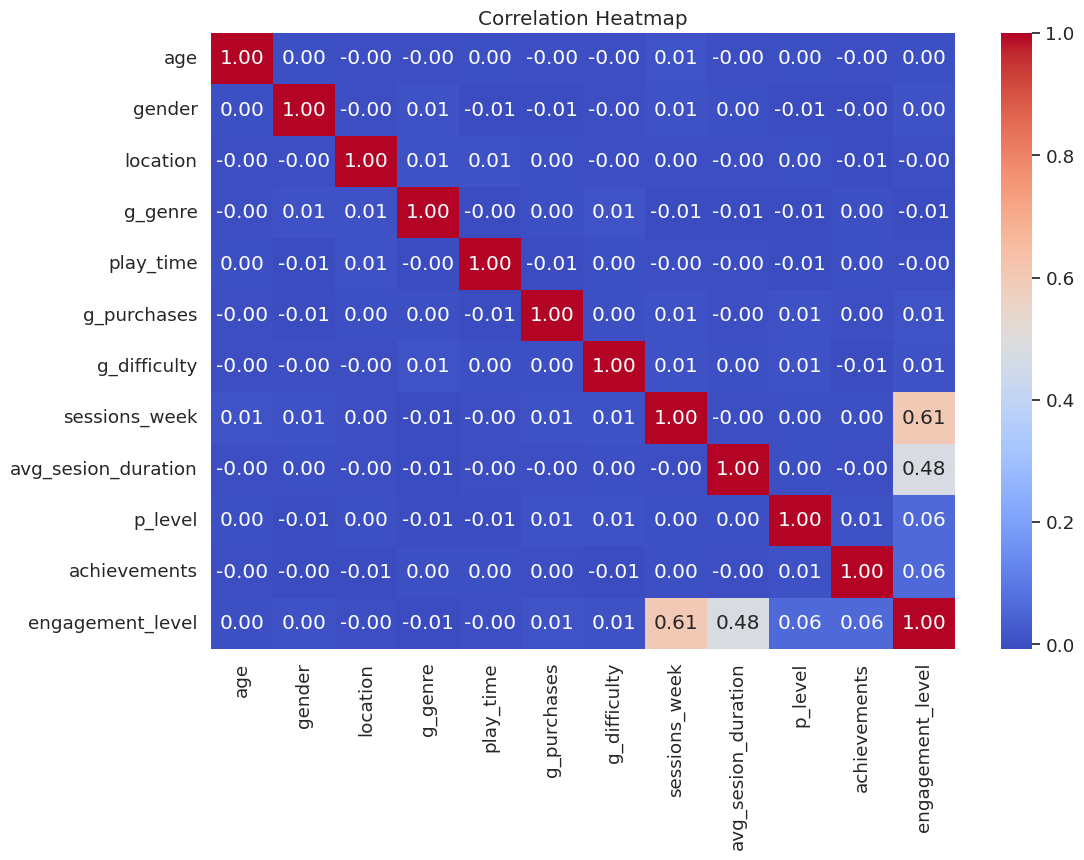

In [20]:
#histogram
plt.figure(figsize=(12, 8))
# Ensure 'df' contains only numerical data for correlation calculation
corr_matrix = df.select_dtypes(include=np.number).corr()  # Select numerical columns only
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

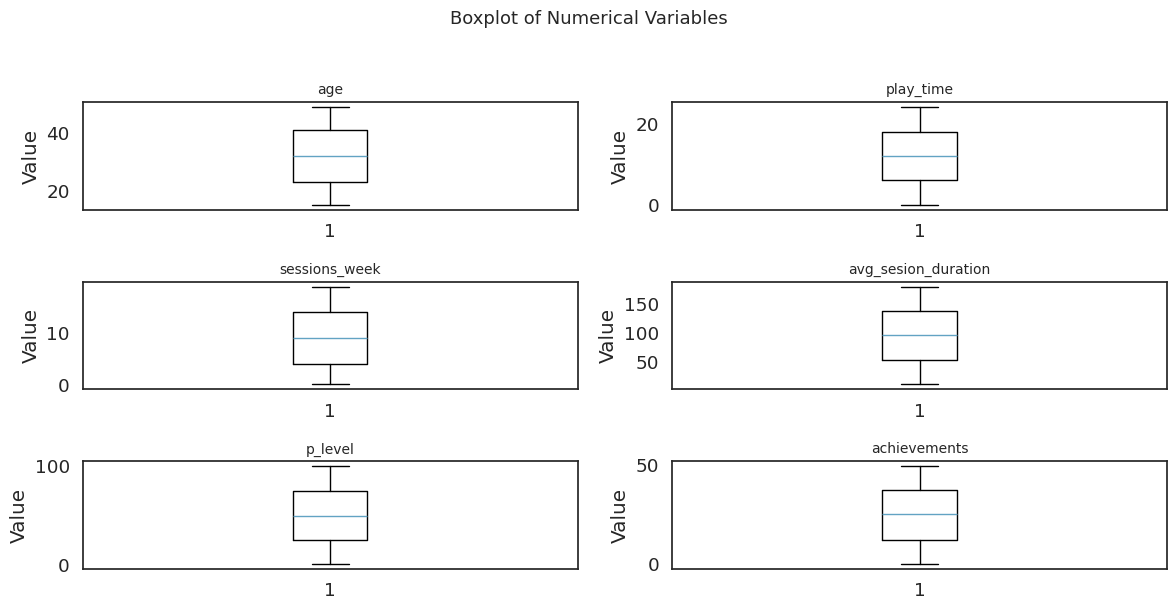

In [21]:
df1 = df.copy()

fig, axs = plt.subplots(len(num_col) // 2 + len(num_col) % 2, 2, figsize=(12, 6))
axs = axs.flatten()

for i, col in enumerate(num_col):
    axs[i].boxplot(df[col])
    axs[i].set_title(col, fontsize=10)
    axs[i].set_ylabel('Value')

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle('Boxplot of Numerical Variables', fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

In [22]:
print(f'Categorical: {cat_col}')
print(f'Numerical: {num_col}')

Categorical: ['gender', 'location', 'g_genre', 'g_purchases', 'g_difficulty']
Numerical: ['age', 'play_time', 'sessions_week', 'avg_sesion_duration', 'p_level', 'achievements']


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder


cat_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder())])
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_col),

    ]
)

In [24]:
X = df1[num_col]
y = df1['engagement_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**`using RandomizedSearchCV for `**

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'classifier__n_estimators': randint(50, 500),'classifier__max_depth': randint(1, 20)}

pipeline = Pipeline([
    #('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

rand_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    random_state=42
)

rand_search.fit(X_train, y_train)

print("Best Parameters:")
print(rand_search.best_params_)

# Evaluate the best model on the test set
best_model = rand_search.best_estimator_
y_pred = best_model.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

Best Parameters:
{'classifier__max_depth': 19, 'classifier__n_estimators': 264}
0.915199200699388


In [26]:
!pip install tqdm
from tqdm import tqdm

In [27]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from tqdm import tqdm

def search_best_seed(seed_range: range):
    best_seed = None
    best_accuracy = 0

    for seed in tqdm(seed_range, desc="Finding Best Seed"):
        try:
            set_seed = np.random.RandomState(seed)
            model = RandomForestClassifier(max_depth=19, n_estimators=264, random_state=set_seed)

            clf = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('classifier', model)
            ])

            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = metrics.accuracy_score(y_test, y_pred)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_seed = seed
        except Exception as e:
            print(f"Error with seed {seed}: {e}")

    print(f'Best Seed: {best_seed}. Accuracy: {best_accuracy}')
    return best_seed


In [28]:
"""# Assuming 'seed_range' is defined, for example:
seed_range = range(1, 100)

# Call the function and store the returned best seed
best_seed_value = search_best_seed(seed_range)

# Print the best seed value
print(f"The best seed value is: {best_seed_value}")"""

'# Assuming \'seed_range\' is defined, for example:\nseed_range = range(1, 100)\n\n# Call the function and store the returned best seed\nbest_seed_value = search_best_seed(seed_range)\n\n# Print the best seed value\nprint(f"The best seed value is: {best_seed_value}")'

In [29]:
best_seed_rf = 33

In [30]:
k = 40

models = {
    'K Neighbors': KNeighborsClassifier(n_neighbors=k),
    'Random Forest': RandomForestClassifier(max_depth=19, n_estimators=264, random_state=best_seed_rf), #n_estimators
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

K Neighbors: Accuracy= 0.8698638691145248
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2093
           1       0.84      0.94      0.89      3879
           2       0.91      0.84      0.88      2035

    accuracy                           0.87      8007
   macro avg       0.88      0.85      0.86      8007
weighted avg       0.87      0.87      0.87      8007



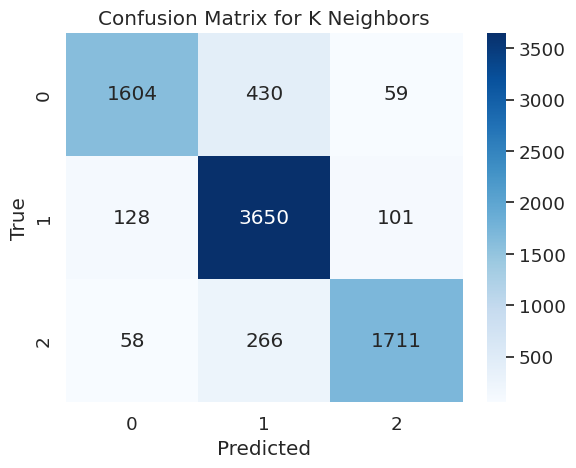

In [31]:
model_name = 'K Neighbors'
model = models[model_name]

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"{model_name}: Accuracy= {accuracy}")
print(metrics.classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

Random Forest: Accuracy= 0.9875417616386174
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8231
           1       0.98      1.00      0.99     15495
           2       0.99      0.98      0.99      8301

    accuracy                           0.99     32027
   macro avg       0.99      0.98      0.99     32027
weighted avg       0.99      0.99      0.99     32027



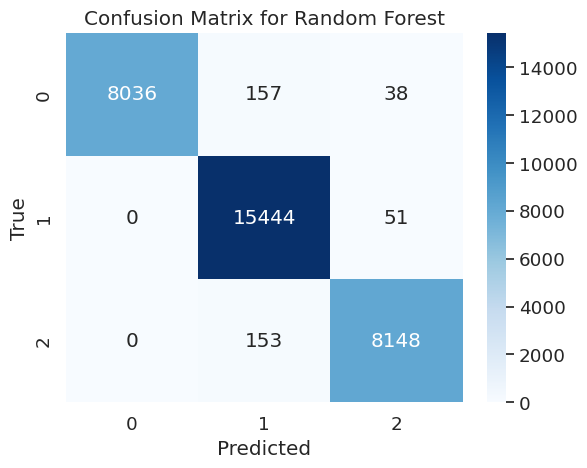

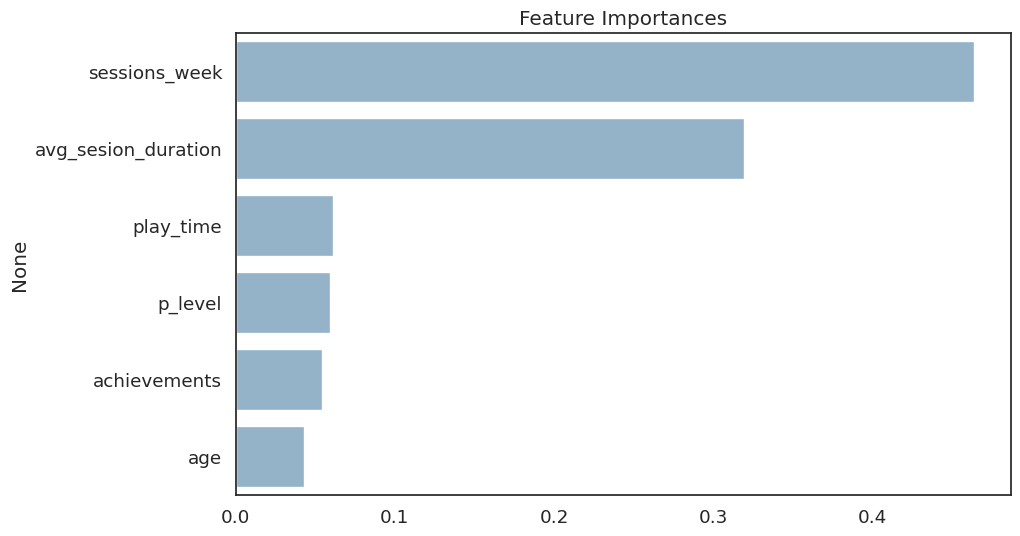

In [32]:
model_name = 'Random Forest'
model = models[model_name]

clf_rf= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_train)

accuracy = metrics.accuracy_score(y_train, y_pred)
print(f"{model_name}: Accuracy= {accuracy}")
print(metrics.classification_report(y_train, y_pred))

cm = metrics.confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

Gradient Boosting: Accuracy= 0.9062070688147871
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2093
           1       0.90      0.94      0.92      3879
           2       0.92      0.88      0.90      2035

    accuracy                           0.91      8007
   macro avg       0.91      0.89      0.90      8007
weighted avg       0.91      0.91      0.91      8007



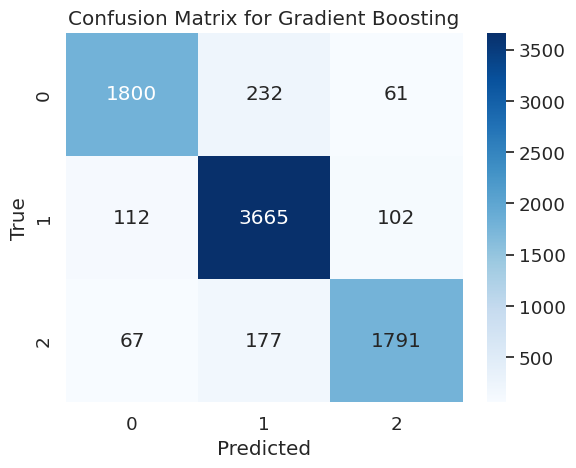

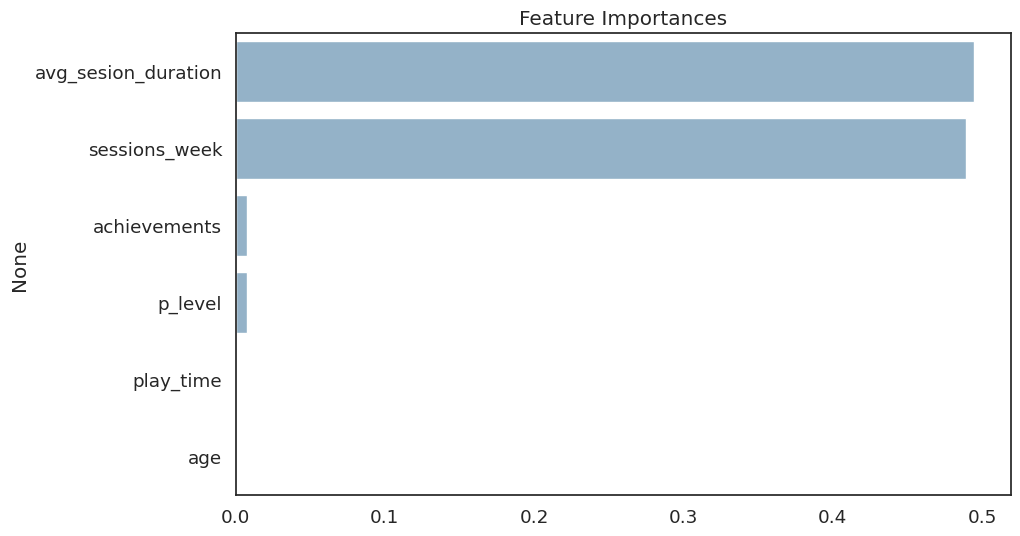

In [33]:
model_name = 'Gradient Boosting'
model = models[model_name]

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"{model_name}: Accuracy= {accuracy}")
print(metrics.classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

Logistic Regression: Accuracy= 0.8212813787935557
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      2093
           1       0.80      0.89      0.84      3879
           2       0.89      0.82      0.85      2035

    accuracy                           0.82      8007
   macro avg       0.83      0.80      0.81      8007
weighted avg       0.82      0.82      0.82      8007



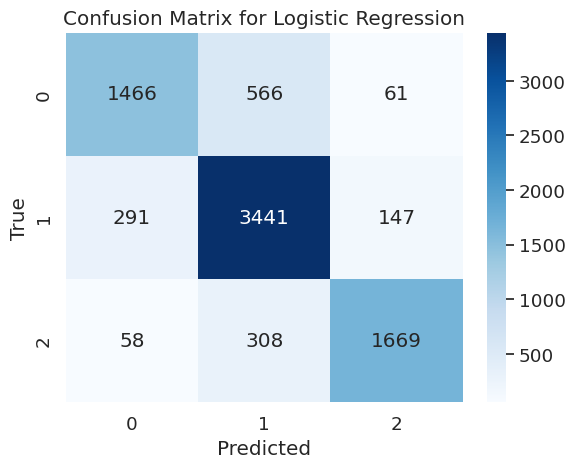

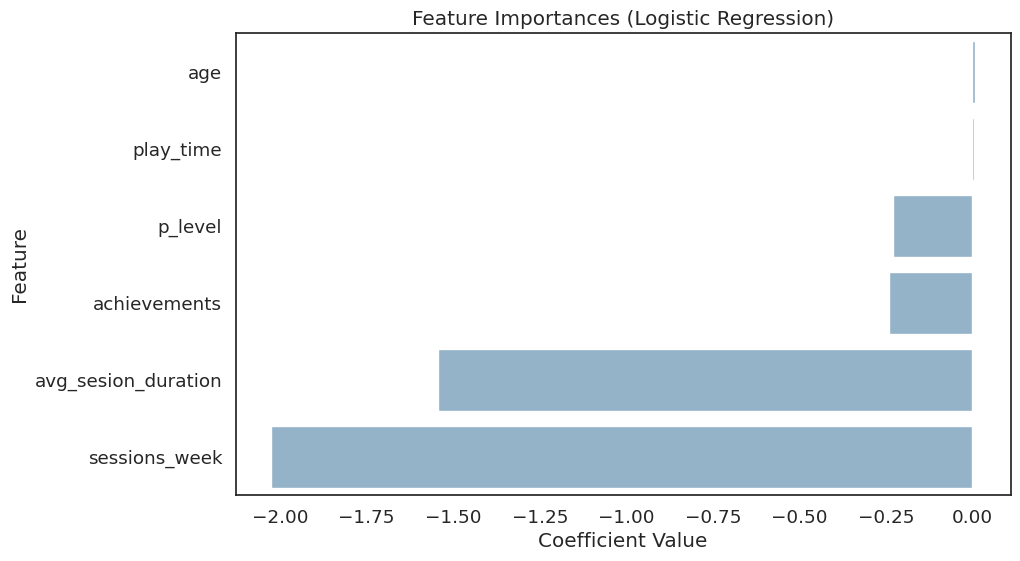

In [34]:
model_name = 'Logistic Regression'
model = models[model_name]

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"{model_name}: Accuracy= {accuracy}")
print(metrics.classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

model = models['Logistic Regression']

importances = model.coef_[0]
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

XGBoost: Accuracy = 0.9143249656550518
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2093
           1       0.91      0.95      0.93      3879
           2       0.92      0.88      0.90      2035

    accuracy                           0.91      8007
   macro avg       0.91      0.91      0.91      8007
weighted avg       0.91      0.91      0.91      8007



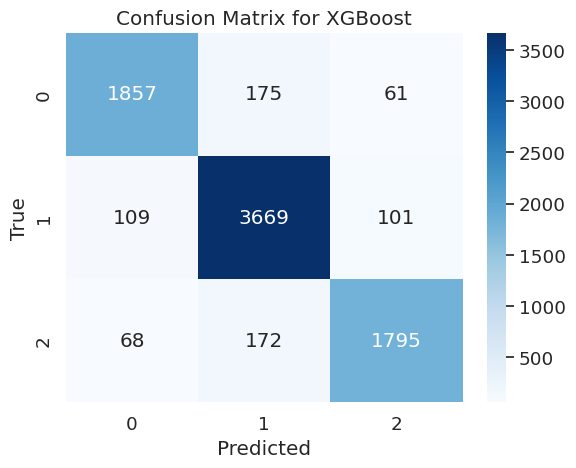

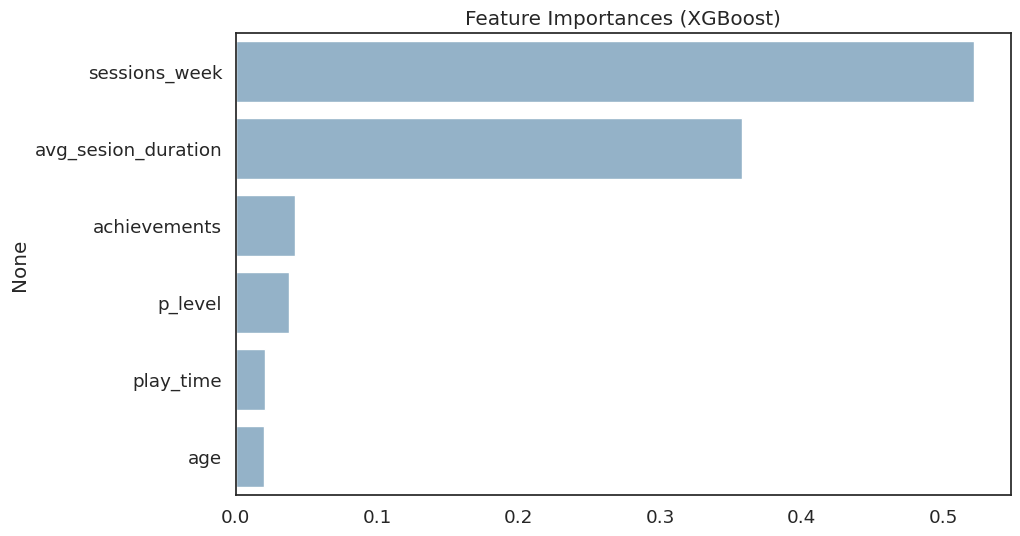

In [35]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

#Using XGBoost
model_xgb = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)

clf_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model_xgb)
])

clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost: Accuracy = {accuracy_xgb}")
print(metrics.classification_report(y_test, y_pred_xgb))

cm_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=model_xgb.classes_, yticklabels=model_xgb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for XGBoost')
plt.show()

importances_xgb = model_xgb.feature_importances_
feature_importances_xgb = pd.Series(importances_xgb, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_xgb.values, y=feature_importances_xgb.index)
plt.title('Feature Importances (XGBoost)')
plt.show()


In [36]:
import joblib
joblib.dump(clf_xgb, 'xgb_model.pkl')

['xgb_model.pkl']

In [37]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.7 MB/s eta 0:00:00


In [38]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.4),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 2.0),
        'random_state': 42,
        'eval_metric': 'mlogloss'
    }

    model = XGBClassifier(**params)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score


In [39]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best Parameters:", study.best_params)
print("Best CV Accuracy: {:.4f}".format(study.best_value))


[I 2025-05-20 09:30:38,570] A new study created in memory with name: no-name-3f5e30f7-8c85-4ab9-b0c5-0cac1d70af11


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-05-20 09:30:47,174] Trial 0 finished with value: 0.9154775461401017 and parameters: {'n_estimators': 373, 'max_depth': 10, 'learning_rate': 0.11617084404519133, 'subsample': 0.8968995046376527, 'colsample_bytree': 0.7733277260920518, 'gamma': 0.34927754076276035, 'reg_alpha': 0.023575871015670158, 'reg_lambda': 0.10648207494888827}. Best is trial 0 with value: 0.9154775461401017.
[I 2025-05-20 09:30:59,716] Trial 1 finished with value: 0.9113248858068861 and parameters: {'n_estimators': 397, 'max_depth': 8, 'learning_rate': 0.22030641660641234, 'subsample': 0.6147431497477872, 'colsample_bytree': 0.8614370237478934, 'gamma': 0.16819477531376703, 'reg_alpha': 0.49348880664257166, 'reg_lambda': 0.8374962366258208}. Best is trial 0 with value: 0.9154775461401017.
[I 2025-05-20 09:31:06,802] Trial 2 finished with value: 0.9128860432133593 and parameters: {'n_estimators': 198, 'max_depth': 6, 'learning_rate': 0.18845936232828372, 'subsample': 0.7916820876754677, 'colsample_bytree': 

In [40]:
from sklearn.metrics import accuracy_score, classification_report # Import classification_report
best_params = {
    'n_estimators': 364,
    'max_depth': 9,
    'learning_rate': 0.03763692690791588,
    'subsample': 0.717604921102892,
    'colsample_bytree': 0.9767581329947443,
    'gamma': 0.3297599185981053,
    'reg_alpha': 0.8258815205634144,
    'reg_lambda': 1.2343871044924173,
    'random_state': 42
}

final_model = xgb.XGBClassifier(**best_params)

clf_xgb_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_model)
])

clf_xgb_final.fit(X_train, y_train)
y_pred_final = clf_xgb_final.predict(X_test)

# Accuracy & Report
print("Final XGBoost Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))


Final XGBoost Accuracy: 0.9166978893468215
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2093
           1       0.92      0.95      0.93      3879
           2       0.92      0.89      0.90      2035

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007



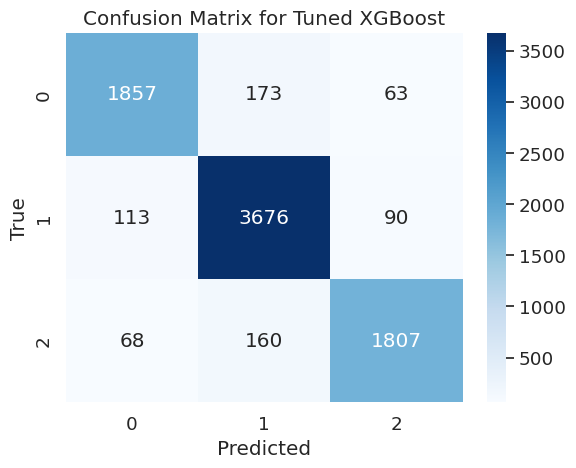

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cm_xgb_final = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm_xgb_final, annot=True, fmt='d', cmap='Blues', xticklabels=clf_xgb_final.classes_, yticklabels=clf_xgb_final.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for Tuned XGBoost')
plt.show()


In [42]:
import joblib
joblib.dump(clf_xgb_final, 'xgb_engagement_model.pkl')


['xgb_engagement_model.pkl']

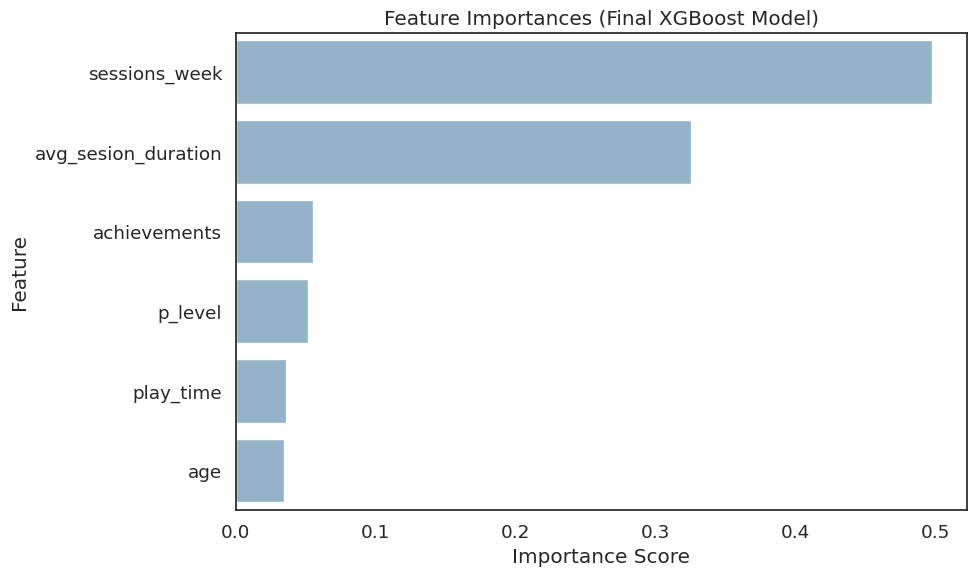

In [43]:
# Get feature importances from the underlying XGBoost model
importances_final = final_model.feature_importances_
feature_importances_final = pd.Series(importances_final, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_final.values, y=feature_importances_final.index)
plt.title('Feature Importances (Final XGBoost Model)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [44]:
def predict_engagement(new_data):

    for col in X_train.columns:
      if col not in new_data.columns:
        new_data[col] = 0 #Or use the mean/median


    predictions = clf_xgb.predict(new_data)
    return predictions

import pandas as pd
new_data = pd.DataFrame({
    'age': [25],
    'play_time': [95],
    'sessions_week': [16],
    'avg_sesion_duration': [142],
    'p_level': [15],
    'achievements': [35],
    'gender': [1],
    'location':[2],
    'g_genre': [0],
    'g_purchases': [1],
    'g_difficulty': [0]


})

predicted_engagement = predict_engagement(new_data)
print(f"Predicted Engagement Level: {predicted_engagement}")


Predicted Engagement Level: [2]


In [45]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.5 MB/s eta 0:00:00


In [46]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import gradio as gr
import joblib


num_col = ['age', 'play_time', 'sessions_week', 'avg_sesion_duration', 'p_level', 'achievements']
cat_col = ['gender', 'location', 'g_genre', 'g_purchases', 'g_difficulty']

# Split data (same as before)
X = df.drop('engagement_level', axis=1)
y = df['engagement_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit preprocessor (same as before)
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_col),
        ('cat', cat_transformer, cat_col)
    ])

preprocessor.fit(X_train)

# **XGBoost Model Training**
model_xgb = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)
clf_xgb = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_xgb)])
clf_xgb.fit(X_train, y_train)

joblib.dump(clf_xgb, 'clf_xgb.pkl')


# Prediction function (modified to use XGBoost)
def predict_engagement(age, play_time, sessions_per_day, p_level, achievements, gender, location, g_genre, g_purchases, g_difficulty):
    try:
        sessions_week = sessions_per_day * 7
        avg_session_duration = (play_time * 60) / sessions_per_day if sessions_per_day > 0 else 0
        # Create a dictionary of user inputs
        new_data_point = {
            'age': age,
            'play_time': play_time,
            'sessions_week': sessions_week,
            'avg_sesion_duration': avg_session_duration,
            'p_level': p_level,
            'achievements': achievements,
            'gender': gender,
            'location': location,
            'g_genre': g_genre,
            'g_purchases': g_purchases,
            'g_difficulty': g_difficulty
        }

        new_data_df = pd.DataFrame([new_data_point])

        # Apply preprocessing using the XGBoost pipeline
        new_data_processed = clf_xgb.named_steps['preprocessor'].transform(new_data_df)

        # Convert transformed data back to DataFrame
        feature_names = num_col + cat_col
        new_data_processed_df = pd.DataFrame(new_data_processed, columns=feature_names)

        # Make prediction using the XGBoost model
        prediction = clf_xgb.named_steps['classifier'].predict(new_data_processed_df)[0]

        engagement_levels = {0: "Low", 1: "Medium", 2: "High"}
        engagement_level = engagement_levels.get(prediction, "Unknown")

        # Save user input (optional)
        user_data = pd.DataFrame([new_data_point])
        user_data.to_csv('user_input.csv', mode='a', header=not pd.io.common.file_exists('user_input.csv'), index=False)

        return f"🎮 Your predicted engagement level is: **{engagement_level}**"
    except Exception as e:
        return f"⚠️ Error: {e}"

interface = gr.Interface(
    fn=predict_engagement,
    inputs=[
        gr.Slider(13, 49, step=1, label="Age (years)"),
        gr.Slider(0, 24, step=0.5, label="Daily Play Time (hours)"),
        gr.Slider(0.1, 15, step=0.1, label="Gaming Sessions per Day"),
        gr.Slider(0, 99, step=1, label="Player Level in Game"),
        gr.Slider(0, 99, step=1, label="Achievements Unlocked"),
        gr.Dropdown([0, 1, 2], label="Gender", info="0: Male, 1: Female, 2: Other"),
        gr.Dropdown([0, 1, 2, 3], label="Location", info="0: USA, 1: Europe, 2: India, 3: Others"),
        gr.Dropdown([0, 1, 2, 3], label="Game Genre", info="0: Action, 1: Adventure, 2: RPG, 3: Sports"),
        gr.Dropdown([0, 1], label="Game Purchases", info="0: No, 1: Yes"),
        gr.Dropdown([0, 1, 2], label="Game Difficulty", info="0: Easy, 1: Medium, 2: Hard")
    ],
    outputs=gr.Textbox(label="Engagement Prediction"),
    title="🎯 Game Engagement Level Predictor Using XGBoost Model",
    description="Enter your gaming habits to predict your engagement level using XGBoost. The model will save all the inputs in 'user_input.csv'"
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c2cba795dbb4078647.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [47]:
import pandas as pd

user_data = pd.read_csv('user_input.csv')
user_data

FileNotFoundError: [Errno 2] No such file or directory: 'user_input.csv'